In [45]:
from PIL import Image
import polars as pl
import os

base_data_path = "data/state-farm-distracted-driver-detection"
train_images_path = f"{base_data_path}/imgs/train"
test_images_path = f"{base_data_path}/imgs/test"

classes = {
    "c0": "Normal driving",
    "c1": "Texting - Right",
    "c2": "Talking on the phone - Right",
    "c3": "texting - Left",
    "c4": "Talking on the phone - Left",
    "c5": "Operating the radio",
    "c6": "Drinking",
    "c7": "Reaching behind",
    "c8": "Hair and makeup",
    "c9": "Talking to passenger"
}
classes_df = pl.DataFrame([[key, value] for key, value in classes.items()], orient='row', schema=["classname","classname_label"])
df = pl.read_csv(f"{base_data_path}/driver_imgs_list.csv")
# df = df.replace("classname", df["classname"].str.)
df_enriched = df.join(classes_df, on="classname")

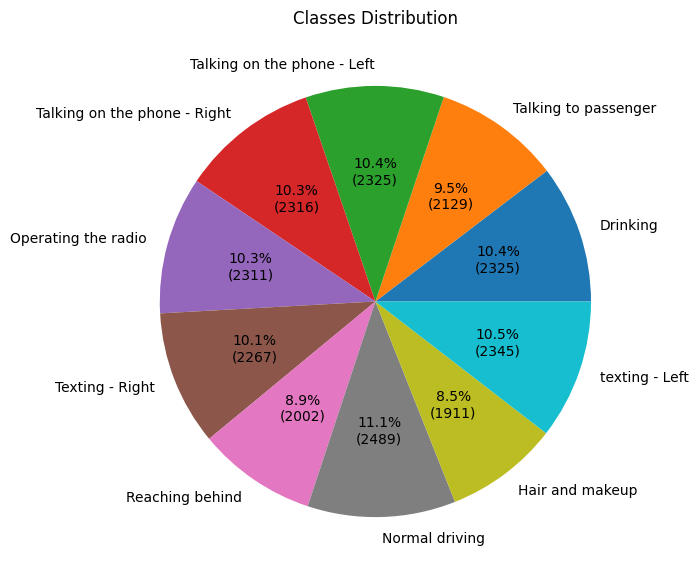

In [46]:
from matplotlib import pyplot as plt
import numpy as np

def func(pct, total):
    absolute = int(pct / 100.*total)
    return "{:.1f}%\n({:d})".format(pct, absolute)

df_groups = df_enriched.groupby("classname_label").count()
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(df_groups["count"],
                                  autopct = lambda pct: func(pct, df_groups["count"].sum()),
                                  labels = df_groups["classname_label"])
 
# Adding legend
ax.set_title("Classes Distribution")
plt.show()

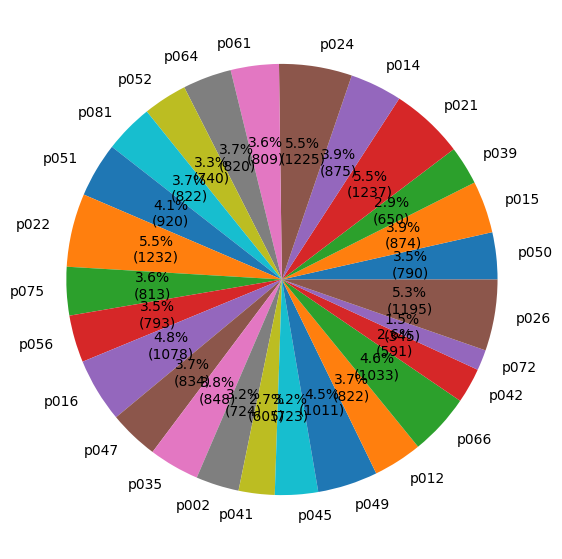

In [47]:
df_groups = df_enriched.groupby("subject").count()
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(df_groups["count"],
                                  autopct = lambda pct: func(pct, df_groups["count"].sum()),
                                  labels = df_groups["subject"])

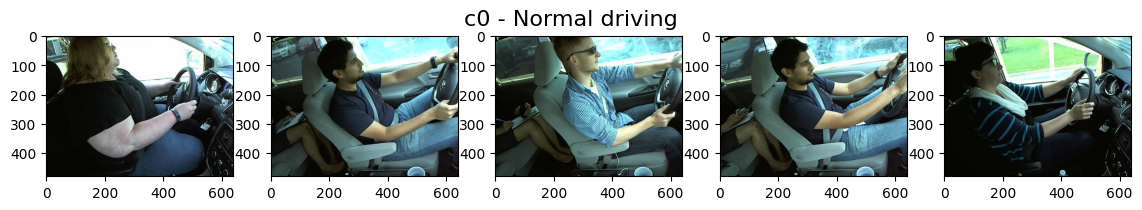

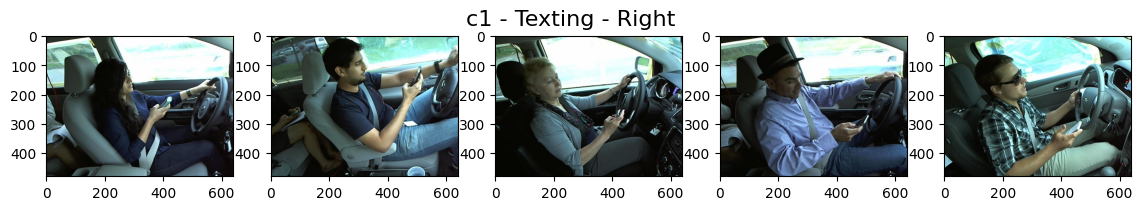

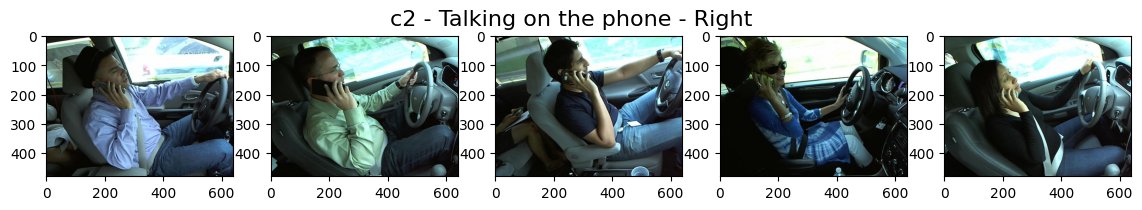

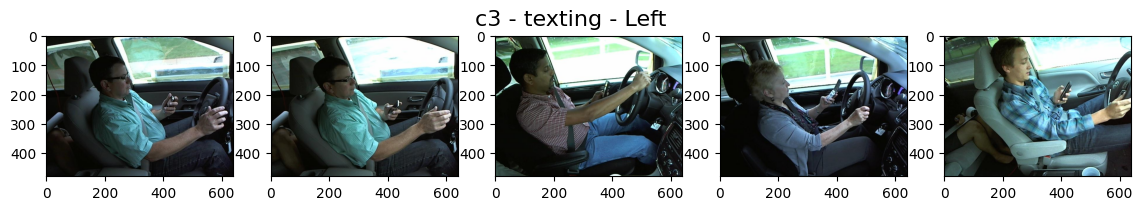

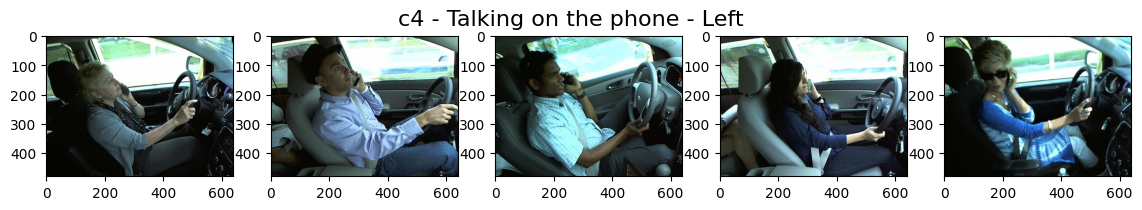

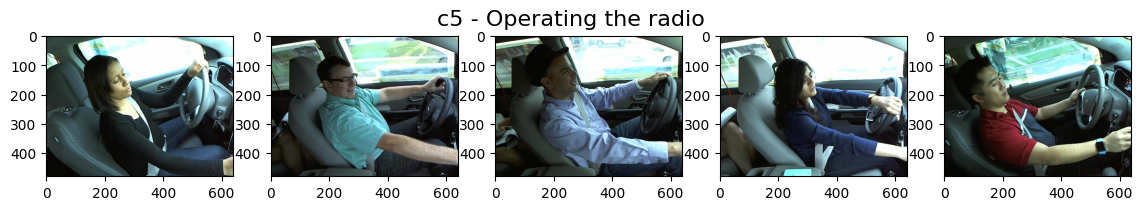

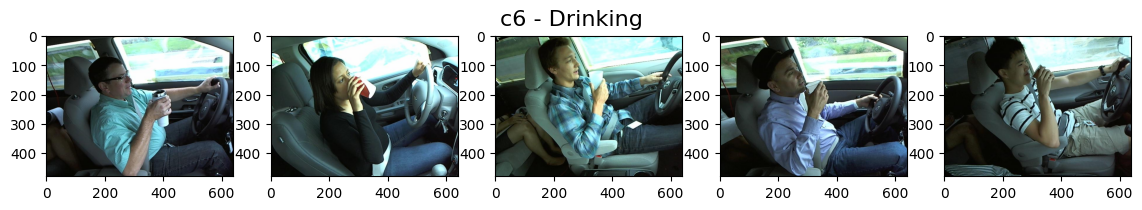

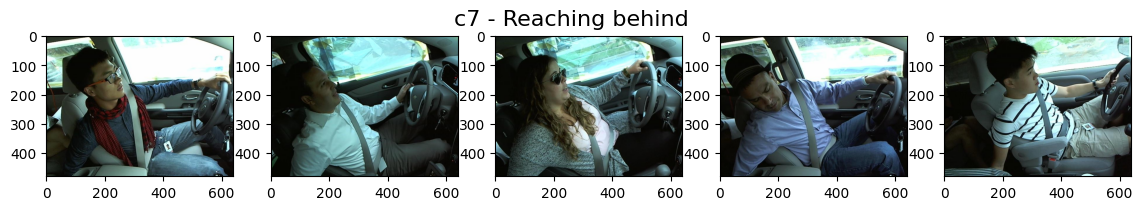

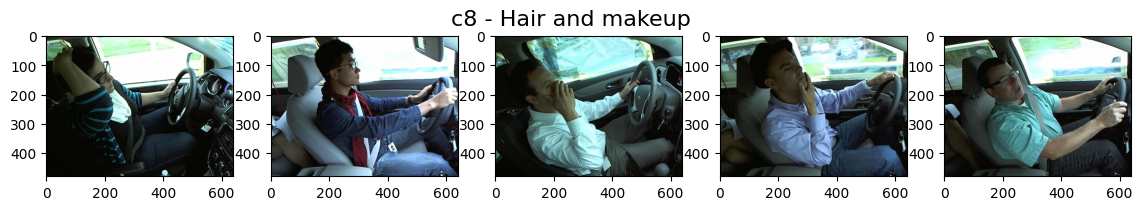

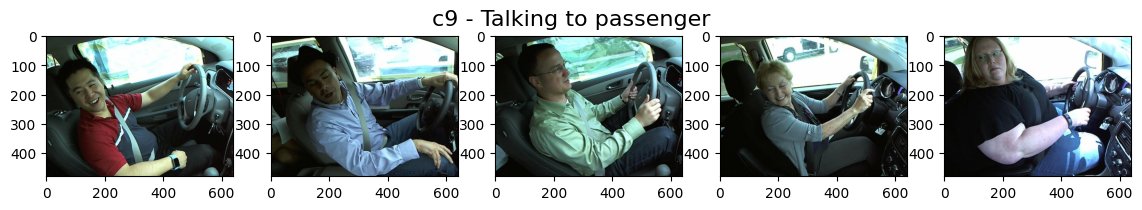

In [90]:
each_class_pics = 5
for classname in list(classes.keys()):
    fig, axes = plt.subplots(1, each_class_pics)
    fig.set_size_inches(14, 2)
    class_path = f"{train_images_path}/{classname}"
    for index, image in enumerate(os.listdir(class_path)[:each_class_pics]):
        img = image = Image.open(f"{class_path}/{image}")
        imgplot = axes[index].imshow(img)
    plt.suptitle(f"{classname} - {classes.get(classname)}", fontsize=16)
    plt.show()
    

# Processing

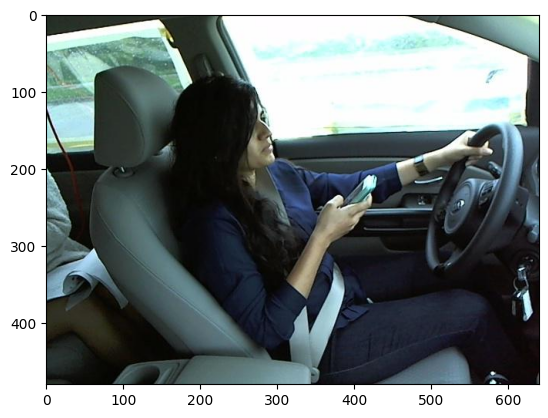

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 38  48  35]
  [ 38  48  35]
  [ 39  49  36]
  ...
  [255 255 255]
  [255 254 255]
  [255 254 255]]

 [[ 38  48  35]
  [ 38  48  35]
  [ 38  48  35]
  ...
  [252 254 254]
  [254 254 254]
  [254 254 254]]

 [[ 37  47  35]
  [ 37  47  35]
  [ 38  48  36]
  ...
  [247 254 251]
  [248 253 251]
  [248 253 251]]

 ...

 [[ 32  39  32]
  [ 34  41  34]
  [ 36  43  36]
  ...
  [ 54  54  48]
  [ 80  80  74]
  [ 93  93  87]]

 [[ 38  47  37]
  [ 39  48  38]
  [ 40  49  39]
  ...
  [ 53  50  45]
  [ 79  76  71]
  [ 93  91  83]]

 [[ 44  53  43]
  [ 43  52  42]
  [ 42  51  41]
  ...
  [ 51  48  43]
  [ 77  75  67]
  [ 93  91  83]]] (480, 640, 3)


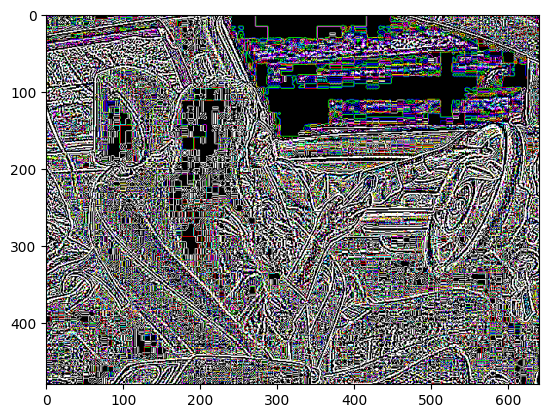

In [109]:
import cv2 as cv
class_path = f"{train_images_path}/c1/"
image_path = f"{class_path}/{os.listdir(class_path)[0]}"
image_obj = Image.open(image_path)
plt.imshow(image_obj)
plt.show()

image = cv.imread(image_path)
print(image, image.shape)

laplacian = cv.Laplacian(image, cv.CV_64F)
plt.imshow(laplacian)
plt.show()